## OC-CCI timeseries analysis for 8-day chlor

In [1]:
%matplotlib inline
# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter, YearLocator

# Data 
import netCDF4 as nc
import numpy as np
import pandas as pd

# Stats
import pymannkendall as mk
from scipy.stats import linregress

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\mkmrt\\OneDrive\\Documents\\year_3'

In [3]:
# NOTE: Please remember to replace my path with your path (pwd) to where your Chla data are
OC = pd.read_csv("C:\\Users\\mkmrt\\OneDrive\\Documents\\year__3\\chlor_a.csv")
OC.head(3)

,date,min,max,mean,std,median
0,2019-01-01T00:00:00,4.187652,6.138091,4.972163,0.044880,4.891020
1,2019-01-09T00:00:00,3.181342,5.950683,4.610897,0.078699,4.563383
2,2019-01-17T00:00:00,3.811871,6.142032,4.959898,0.061589,4.897897


In [4]:
# Make a subset dataframe of the date and mean CHL for further processing
df = pd.DataFrame({'Date':OC['date'], 'Chl':OC['mean'], 'Std':OC['std']})

In [5]:
# Make date format more friendly to use
df['Date']= pd.to_datetime(df['Date'], format=('%Y-%m-%dT%H:%M:%S'))
df.head(4)

,Date,Chl,Std
0,2019-01-01,4.972163,0.044880
1,2019-01-09,4.610897,0.078699
2,2019-01-17,4.959898,0.061589
3,2019-01-25,5.439614,0.057859


In [6]:
# How many years in our timeseries:
num=df['Date'].dt.year.nunique()
num

1

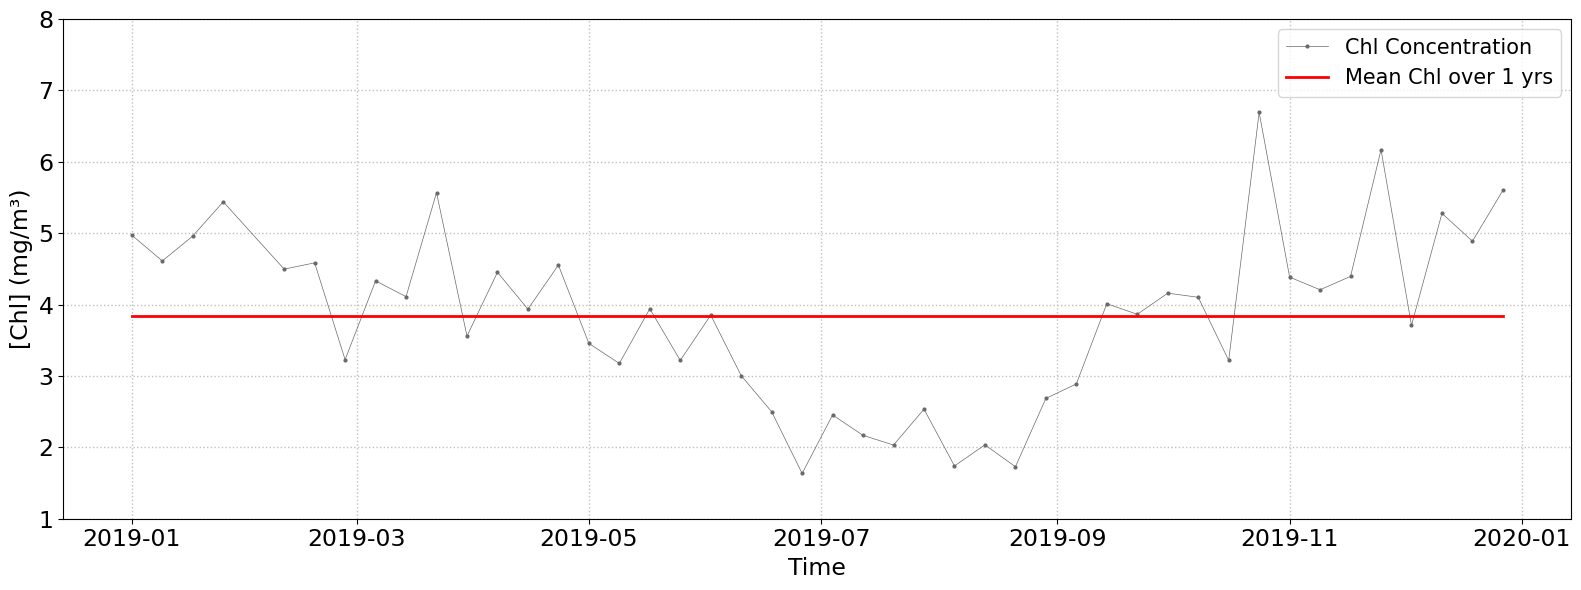

In [7]:
# Lineplot of [Chl] and Associated STD (full timeseries) with means
fig1, ax1 = plt.subplots(figsize=(16, 6))  # 1 row, 2 columns
#-----------------------------------------------------------------------------------------------------------
# Plot on the first axis (Chl)
ax1.plot(df['Date'], df['Chl'], linewidth=0.5, linestyle='-', marker='o', markersize=2, c='dimgrey',
         label='Chl Concentration')

# Mean [Chl] line in red on the first axis
mean_chl = np.nanmean(df['Chl'])
ax1.plot([df['Date'].min(), df['Date'].max()], [mean_chl, mean_chl], color='r', linestyle='-', linewidth=2, 
         label=f'Mean Chl over {num} yrs')
# Set y-axis limits for the first axis (Chl)
ax1.set_ylim([1, 8])

# Add labels and grid to the first axis
ax1.set_xlabel('Time')
ax1.set_ylabel('[Chl] (mg/m³)') #added unit
ax1.grid(True, color='silver', linestyle=':', linewidth=1)
ax1.legend()

#adjust the font size
ax1.tick_params(axis='both', labelsize=17)
ax1.legend(prop={'size': 15})
ax1.set_xlabel('Time', fontsize=17)
ax1.set_ylabel('[Chl] (mg/m³)', fontsize=17)

#-----------------------------------------------------------------------------------------------------------
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()